In [2]:
# load data
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
feature = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]
print('data size = ', feature.shape)
print('target size = ', price.shape)
'''
from: data_url:
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retai@l business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
'''
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']


data size =  (506, 13)
target size =  (506,)


In [3]:
# more details of data
df_feature = pd.DataFrame(feature, columns = feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [4]:
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [5]:
df_boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<Figure size 640x480 with 0 Axes>

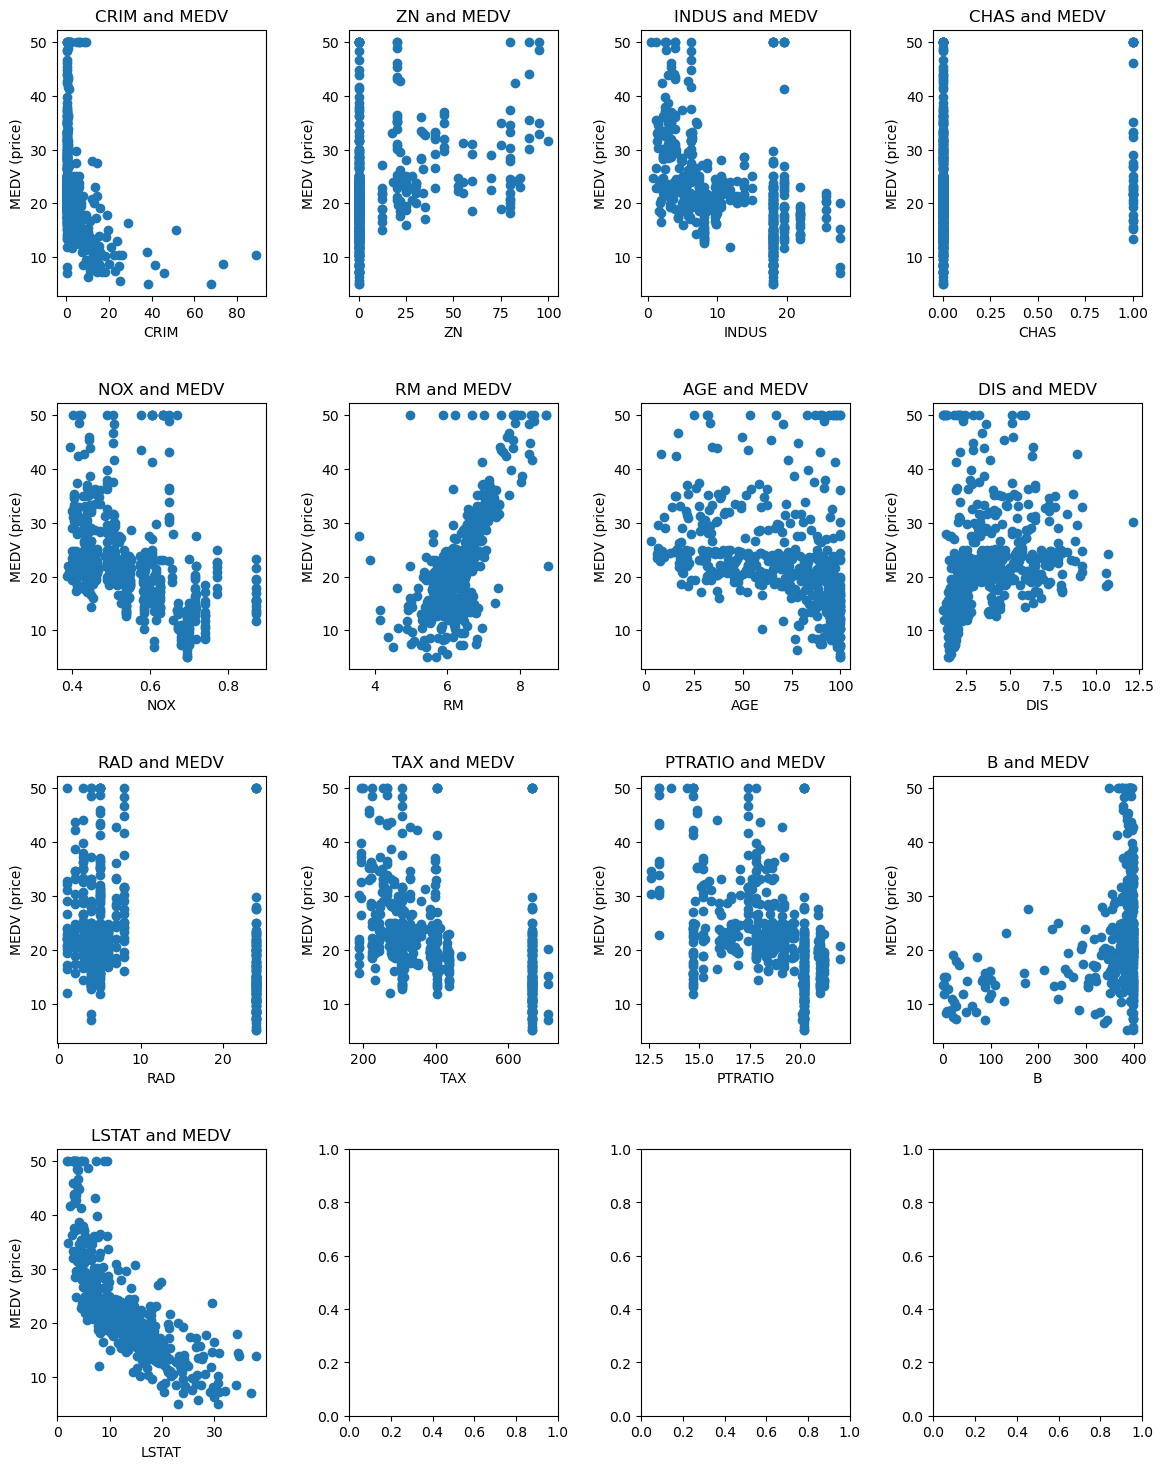

Top 3 features mostly related to MEDV: 

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787


In [6]:
# 1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(len(feature_names)):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

#Question 1 to find mostly linearly related features
data = pd.DataFrame(feature, columns=feature_names)
data['MEDV'] = price

correlation = data.corr()['MEDV'].drop('MEDV')
top = correlation.abs().nlargest(3).index.tolist()

#selfnote: using to_string() transfers to string object
print("Top 3 features mostly related to MEDV: \n")
print(correlation[top].to_string())

#After running the code, LSTAT, RM and PTRATIO are the top 3

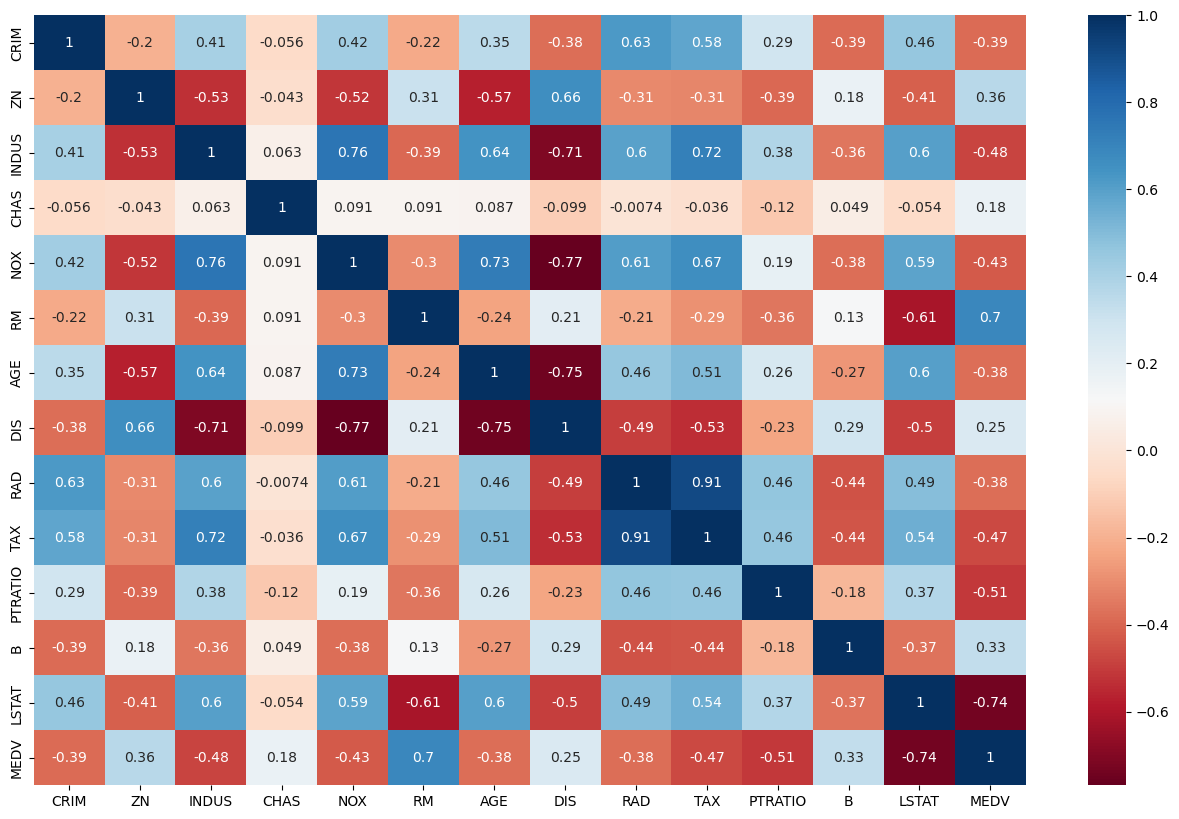

Top 3 features mostly linearly related to MEDV: 
['LSTAT', 'RM', 'PTRATIO']


In [7]:
# 2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

correlation_matrix = df_boston.corr()['MEDV'].drop('MEDV')
topmatrix = correlation_matrix.abs().nlargest(3).index.tolist()

print("Top 3 features mostly linearly related to MEDV: ")
print(topmatrix)

#the top 3 are the same as in the last question

In [8]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [9]:
# 3 linear regression and ridge regression
import numpy as np
#X= nxd matrix, y= n-dim vector

def least_square(X, y):
    theta= np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

def ridge_reg(X, y, eta):
    d = X.shape[1]
    theta = np.linalg.inv(X.T @ X + eta * np.identity(d)) @ X.T @ y
    return theta

# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(feature_names, theta),columns=['Feature','Coeff'])
print('Linear Regression: \n', df_theta, '\n')

# apply ridge regression 
etas = [0.1, 1.0, 10.0, 100.0]
for eta in etas:
    print('Ridge regression: \n Eta value:', eta)
    theta_r = ridge_reg(X_train, y_train, eta)
    df_theta_r = pd.DataFrame(zip(feature_names, theta_r),columns=['Feature','Coeff'])
    print(df_theta_r, '\n')
    

Linear Regression: 
     Feature     Coeff
0      CRIM -0.099324
1        ZN  0.052251
2     INDUS  0.004516
3      CHAS  2.957261
4       NOX  1.127938
5        RM  5.854198
6       AGE -0.014957
7       DIS -0.920844
8       RAD  0.159519
9       TAX -0.008934
10  PTRATIO -0.435674
11        B  0.014905
12    LSTAT -0.474751 

Ridge regression: 
 Eta value: 0.1
    Feature     Coeff
0      CRIM -0.099367
1        ZN  0.052279
2     INDUS  0.004860
3      CHAS  2.946309
4       NOX  1.077829
5        RM  5.854416
6       AGE -0.014853
7       DIS -0.920843
8       RAD  0.159618
9       TAX -0.008930
10  PTRATIO -0.435259
11        B  0.014918
12    LSTAT -0.474683 

Ridge regression: 
 Eta value: 1.0
    Feature     Coeff
0      CRIM -0.099660
1        ZN  0.052550
2     INDUS  0.006999
3      CHAS  2.846734
4       NOX  0.810144
5        RM  5.848060
6       AGE -0.014077
7       DIS -0.919409
8       RAD  0.160346
9       TAX -0.008919
10  PTRATIO -0.431701
11        B  0.015015
12 

In [10]:
# 4 evaluation
def pred_fn(X, theta):
    pred= X @ theta
    return pred

def root_mean_square_error(pred, y):
    rmse = np.sqrt(np.mean((y - pred)**2))
    return rmse

theta_linear = least_square(X_train, y_train)
theta_ridge = ridge_reg(X_train, y_train, 10.0)  # Example eta value

# Make predictions on training set
pred_linear_train = pred_fn(X_train, theta_linear)
pred_ridge_train = pred_fn(X_train, theta_ridge)

# Make predictions on test set
pred_linear_test = pred_fn(X_test, theta_linear)
pred_ridge_test = pred_fn(X_test, theta_ridge)

# Calculate RMSE on training set
rmse_linear_train = root_mean_square_error(pred_linear_train, y_train)
rmse_ridge_train = root_mean_square_error(pred_ridge_train, y_train)

# Calculate RMSE on test set
rmse_linear_test = root_mean_square_error(pred_linear_test, y_test)
rmse_ridge_test = root_mean_square_error(pred_ridge_test, y_test)

print("Training RMSE - Linear Regression:", rmse_linear_train)
print("Training RMSE - Ridge Regression:", rmse_ridge_train, '\n')
print("Test RMSE - Linear Regression:", rmse_linear_test)
print("Test RMSE - Ridge Regression:", rmse_ridge_test, '\n')


Training RMSE - Linear Regression: 4.820626531838223
Training RMSE - Ridge Regression: 4.829777333975097 

Test RMSE - Linear Regression: 5.209217510530916
Test RMSE - Ridge Regression: 5.189347305423606 



In [27]:
# 5 linear models of top-3 features
top = ['LSTAT', 'RM', 'PTRATIO']

X_train_top = X_train[:, [feature_names.index(feature) for feature in top]]
X_test_top = X_test[:, [feature_names.index(feature) for feature in top]]

theta_linear_top = least_square(X_train_top, y_train) 
theta_ridge_top = ridge_reg(X_train_top, y_train, 10.0) 

#Predictions
pred_linear_train_top = pred_fn(X_train_top, theta_linear_top)  
pred_ridge_train_top = pred_fn(X_train_top, theta_ridge_top)  
pred_linear_test_top = pred_fn(X_test_top, theta_linear_top) 
pred_ridge_test_top = pred_fn(X_test_top, theta_ridge_top)  

#RMSE 
rmse_linear_train_top = root_mean_square_error(pred_linear_train_top, y_train)  
rmse_ridge_train_top = root_mean_square_error(pred_ridge_train_top, y_train)  
rmse_linear_test_top = root_mean_square_error(pred_linear_test_top, y_test) 
rmse_ridge_test_top = root_mean_square_error(pred_ridge_test_top, y_test)  


print("RMSE using top-3 features:")
print("Training RMSE - Linear Regression:", rmse_linear_train_top)
print("Training RMSE - Ridge Regression:", rmse_ridge_train_top, '\n')  
print("Test RMSE - Linear Regression:", rmse_linear_test_top)  
print("Test RMSE - Ridge Regression:", rmse_ridge_test_top, '\n')


RMSE using top-3 features:
Training RMSE - Linear Regression: 5.273361751695365
Training RMSE - Ridge Regression: 5.276310228536868 

Test RMSE - Linear Regression: 5.494723646664543
Test RMSE - Ridge Regression: 5.47757344311873 

